In [1]:
import mne
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pickle
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

# Remove problematic edf files and write the data

In [3]:
def change_channel_names(raw):
    # Drop the last two channels (assuming they are ECG and Resp)
    raw.drop_channels(raw.ch_names[-2:])

    # Normalize channel names: remove 'EEG ' and any '-Ref' or '-REF'
    new_ch_names = {ch: ch[4:].replace('-Ref', '').replace('-REF', '') for ch in raw.ch_names}
    raw.rename_channels(new_ch_names)

    # Apply the standard montage
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage, on_missing='ignore')

    return raw

In [4]:
def remove_artifactuals_using_ICA(raw):
  ica = mne.preprocessing.ICA(n_components=19, random_state=42)
  ica.fit(raw.copy().filter(1, 40))
  bad_indices = []
  for channel in raw.ch_names:
    bad_idx, scores = ica.find_bads_eog(raw, channel, threshold=2)
    bad_indices.extend(bad_idx)

  bad_indices = list(set(bad_indices))
  ica.exclude = bad_indices
  corrected_data = ica.apply(raw.copy(), exclude = bad_indices)
  return corrected_data

In [5]:
file_path = r"C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg"
exclude_patients = []
num_edf_files=79
data=[]
for patient_file in tqdm(range(1, num_edf_files+1)):
    if patient_file not in exclude_patients:
        raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
        #raw = change_channel_names(raw)
        #raw = remove_artifactuals_using_ICA(raw)
        processed_data=raw.get_data()
        data.append(processed_data)

  0%|          | 0/79 [00:00<?, ?it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1790207  =      0.000 ...  6992.996 secs...


  1%|▏         | 1/79 [00:00<00:47,  1.65it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 962815  =      0.000 ...  3760.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  3%|▎         | 2/79 [00:00<00:32,  2.35it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1129471  =      0.000 ...  4411.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  4%|▍         | 3/79 [00:01<00:24,  3.05it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 876799  =      0.000 ...  3424.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  5%|▌         | 4/79 [00:01<00:20,  3.72it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 983295  =      0.000 ...  3840.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  6%|▋         | 5/79 [00:01<00:18,  3.98it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1203967  =      0.000 ...  4702.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  8%|▊         | 6/79 [00:01<00:18,  3.90it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 935423  =      0.000 ...  3653.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  9%|▉         | 7/79 [00:01<00:16,  4.31it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg8.edf...
EDF file detected
Setting channel info structure...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)


Creating raw.info structure...
Reading 0 ... 1180927  =      0.000 ...  4612.996 secs...


 10%|█         | 8/79 [00:02<00:17,  4.02it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 908799  =      0.000 ...  3549.996 secs...


 11%|█▏        | 9/79 [00:02<00:15,  4.39it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1389311  =      0.000 ...  5426.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 13%|█▎        | 10/79 [00:02<00:16,  4.25it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1916927  =      0.000 ...  7487.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 14%|█▍        | 11/79 [00:03<00:20,  3.39it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1143807  =      0.000 ...  4467.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 15%|█▌        | 12/79 [00:03<00:19,  3.48it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3946495  =      0.000 ... 15415.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 16%|█▋        | 13/79 [00:04<00:28,  2.31it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 953855  =      0.000 ...  3725.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 18%|█▊        | 14/79 [00:04<00:24,  2.64it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1765887  =      0.000 ...  6897.996 secs...


 19%|█▉        | 15/79 [00:04<00:23,  2.75it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1520895  =      0.000 ...  5940.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 20%|██        | 16/79 [00:05<00:21,  2.91it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1406207  =      0.000 ...  5492.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 22%|██▏       | 17/79 [00:05<00:21,  2.94it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 934655  =      0.000 ...  3650.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 23%|██▎       | 18/79 [00:05<00:18,  3.27it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2305535  =      0.000 ...  9005.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 24%|██▍       | 19/79 [00:06<00:20,  2.94it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1020671  =      0.000 ...  3986.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 25%|██▌       | 20/79 [00:06<00:18,  3.16it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1460991  =      0.000 ...  5706.996 secs...


 27%|██▋       | 21/79 [00:06<00:19,  2.90it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 984063  =      0.000 ...  3843.996 secs...


 28%|██▊       | 22/79 [00:07<00:19,  2.88it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1134847  =      0.000 ...  4432.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 29%|██▉       | 23/79 [00:07<00:18,  2.96it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 948735  =      0.000 ...  3705.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 30%|███       | 24/79 [00:07<00:18,  3.02it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1717503  =      0.000 ...  6708.996 secs...


 32%|███▏      | 25/79 [00:08<00:21,  2.53it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1070591  =      0.000 ...  4181.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 33%|███▎      | 26/79 [00:08<00:20,  2.60it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 894975  =      0.000 ...  3495.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 34%|███▍      | 27/79 [00:08<00:18,  2.86it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1473791  =      0.000 ...  5756.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 35%|███▌      | 28/79 [00:09<00:20,  2.52it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2057471  =      0.000 ...  8036.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 37%|███▋      | 29/79 [00:09<00:23,  2.13it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1007871  =      0.000 ...  3936.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 38%|███▊      | 30/79 [00:10<00:21,  2.29it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 903423  =      0.000 ...  3528.996 secs...


 39%|███▉      | 31/79 [00:10<00:18,  2.60it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1180927  =      0.000 ...  4612.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 41%|████      | 32/79 [00:10<00:17,  2.66it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 959231  =      0.000 ...  3746.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 42%|████▏     | 33/79 [00:11<00:16,  2.82it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1661695  =      0.000 ...  6490.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 43%|████▎     | 34/79 [00:11<00:19,  2.34it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 964351  =      0.000 ...  3766.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 44%|████▍     | 35/79 [00:12<00:18,  2.38it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1300991  =      0.000 ...  5081.996 secs...


 46%|████▌     | 36/79 [00:12<00:17,  2.40it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1171967  =      0.000 ...  4577.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 47%|████▋     | 37/79 [00:13<00:17,  2.45it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1560319  =      0.000 ...  6094.996 secs...


 48%|████▊     | 38/79 [00:13<00:18,  2.25it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1185023  =      0.000 ...  4628.996 secs...


 49%|████▉     | 39/79 [00:14<00:17,  2.26it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1494271  =      0.000 ...  5836.996 secs...


 51%|█████     | 40/79 [00:14<00:17,  2.22it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2479103  =      0.000 ...  9683.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 52%|█████▏    | 41/79 [00:15<00:21,  1.75it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1273343  =      0.000 ...  4973.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 53%|█████▎    | 42/79 [00:15<00:20,  1.85it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1864447  =      0.000 ...  7282.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 54%|█████▍    | 43/79 [00:16<00:19,  1.83it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg44.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 860159  =      0.000 ...  3359.996 secs...


 56%|█████▌    | 44/79 [00:16<00:16,  2.12it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 978431  =      0.000 ...  3821.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 57%|█████▋    | 45/79 [00:16<00:14,  2.40it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1310719  =      0.000 ...  5119.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 58%|█████▊    | 46/79 [00:17<00:13,  2.40it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg47.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923135  =      0.000 ...  3605.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 59%|█████▉    | 47/79 [00:17<00:12,  2.46it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 983039  =      0.000 ...  3839.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 61%|██████    | 48/79 [00:18<00:11,  2.63it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg49.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2212607  =      0.000 ...  8642.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 62%|██████▏   | 49/79 [00:18<00:14,  2.05it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2521599  =      0.000 ...  9849.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 63%|██████▎   | 50/79 [00:19<00:17,  1.63it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg51.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1203455  =      0.000 ...  4700.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 65%|██████▍   | 51/79 [00:20<00:15,  1.80it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1003519  =      0.000 ...  3919.996 secs...


 66%|██████▌   | 52/79 [00:20<00:12,  2.09it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 888319  =      0.000 ...  3469.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 67%|██████▋   | 53/79 [00:20<00:10,  2.38it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1112063  =      0.000 ...  4343.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 68%|██████▊   | 54/79 [00:21<00:10,  2.35it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1321215  =      0.000 ...  5160.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 70%|██████▉   | 55/79 [00:21<00:10,  2.30it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 980735  =      0.000 ...  3830.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 71%|███████   | 56/79 [00:21<00:09,  2.46it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg57.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 802047  =      0.000 ...  3132.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 72%|███████▏  | 57/79 [00:22<00:07,  2.76it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1199359  =      0.000 ...  4684.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 73%|███████▎  | 58/79 [00:22<00:07,  2.67it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1004287  =      0.000 ...  3922.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 75%|███████▍  | 59/79 [00:22<00:06,  2.86it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 967423  =      0.000 ...  3778.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 76%|███████▌  | 60/79 [00:23<00:06,  2.89it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg61.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1492223  =      0.000 ...  5828.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 77%|███████▋  | 61/79 [00:23<00:06,  2.69it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg62.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1498111  =      0.000 ...  5851.996 secs...


 78%|███████▊  | 62/79 [00:24<00:07,  2.37it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg63.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 998399  =      0.000 ...  3899.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 80%|███████▉  | 63/79 [00:24<00:06,  2.48it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg64.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1622271  =      0.000 ...  6336.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 81%|████████  | 64/79 [00:25<00:06,  2.40it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg65.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1228799  =      0.000 ...  4799.996 secs...


 82%|████████▏ | 65/79 [00:25<00:05,  2.55it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg66.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2905599  =      0.000 ... 11349.996 secs...


 84%|████████▎ | 66/79 [00:26<00:07,  1.81it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg67.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1254399  =      0.000 ...  4899.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 85%|████████▍ | 67/79 [00:26<00:06,  1.94it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg68.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 925439  =      0.000 ...  3614.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 86%|████████▌ | 68/79 [00:27<00:05,  2.18it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg69.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1017087  =      0.000 ...  3972.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 87%|████████▋ | 69/79 [00:27<00:04,  2.42it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg70.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1255935  =      0.000 ...  4905.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 89%|████████▊ | 70/79 [00:27<00:03,  2.30it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg71.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1094655  =      0.000 ...  4275.996 secs...


 90%|████████▉ | 71/79 [00:28<00:03,  2.43it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg72.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1279487  =      0.000 ...  4997.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 91%|█████████ | 72/79 [00:28<00:02,  2.51it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg73.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 954879  =      0.000 ...  3729.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 92%|█████████▏| 73/79 [00:28<00:02,  2.58it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg74.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1117183  =      0.000 ...  4363.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 94%|█████████▎| 74/79 [00:29<00:01,  2.69it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg75.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1012479  =      0.000 ...  3954.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 95%|█████████▍| 75/79 [00:29<00:01,  2.70it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg76.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 978175  =      0.000 ...  3820.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 96%|█████████▌| 76/79 [00:29<00:01,  2.85it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg77.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1073407  =      0.000 ...  4192.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 97%|█████████▋| 77/79 [00:30<00:00,  2.59it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg78.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1272575  =      0.000 ...  4970.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 99%|█████████▊| 78/79 [00:30<00:00,  2.55it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg79.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 844031  =      0.000 ...  3296.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\2318526172.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
100%|██████████| 79/79 [00:31<00:00,  2.54it/s]


In [6]:
# Read annotations
path='C:\\Users\\user\\Desktop\\Manuscript_Projects_IISERTVM\\EEG data\\dataset'
annotation_path_A = path + '\\annotations_2017_A.csv'
annotation_path_B = path + '\\annotations_2017_B.csv'
annotation_path_C = path + '\\annotations_2017_C.csv'

annotation_data_A = pd.read_csv(annotation_path_A)
annotation_data_B = pd.read_csv(annotation_path_B)
annotation_data_C = pd.read_csv(annotation_path_C)


annotation_data_dict={'A':annotation_data_A,'B':annotation_data_B,'C':annotation_data_C}

In [7]:
for doctor in ['A','B','C']:
    for i in range(len(data)):
        data_point=data[i]
        annot=annotation_data_dict[doctor].columns[i]
        a=int(data_point.shape[1]/256)
        b=int(annotation_data_dict[doctor][annot][np.array(annotation_data_dict[doctor][annot]>=0)].shape[0])
        if a!=b:
            print(annot)

2
3


In [8]:
file_path = r"C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg"
exclude_patients = [40,41,69,2,3] ##problematic edf files or annotations
num_edf_files=79
data=[]
for patient_file in tqdm(range(1, num_edf_files+1)):
    if patient_file not in exclude_patients:
        raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
        #raw = change_channel_names(raw)
        #raw = remove_artifactuals_using_ICA(raw)
        processed_data=raw.get_data()
        data.append(processed_data)

  0%|          | 0/79 [00:00<?, ?it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1790207  =      0.000 ...  6992.996 secs...


  1%|▏         | 1/79 [00:00<00:38,  2.03it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 876799  =      0.000 ...  3424.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  5%|▌         | 4/79 [00:00<00:12,  6.16it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 983295  =      0.000 ...  3840.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  6%|▋         | 5/79 [00:01<00:14,  5.18it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1203967  =      0.000 ...  4702.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  8%|▊         | 6/79 [00:01<00:17,  4.24it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 935423  =      0.000 ...  3653.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
  9%|▉         | 7/79 [00:01<00:18,  3.88it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1180927  =      0.000 ...  4612.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 10%|█         | 8/79 [00:02<00:20,  3.55it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 908799  =      0.000 ...  3549.996 secs...


 11%|█▏        | 9/79 [00:02<00:18,  3.72it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1389311  =      0.000 ...  5426.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 13%|█▎        | 10/79 [00:02<00:20,  3.32it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1916927  =      0.000 ...  7487.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 14%|█▍        | 11/79 [00:03<00:25,  2.70it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1143807  =      0.000 ...  4467.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 15%|█▌        | 12/79 [00:03<00:24,  2.79it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3946495  =      0.000 ... 15415.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 16%|█▋        | 13/79 [00:04<00:37,  1.75it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 953855  =      0.000 ...  3725.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 18%|█▊        | 14/79 [00:04<00:31,  2.07it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1765887  =      0.000 ...  6897.996 secs...


 19%|█▉        | 15/79 [00:05<00:31,  2.02it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1520895  =      0.000 ...  5940.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 20%|██        | 16/79 [00:05<00:29,  2.12it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1406207  =      0.000 ...  5492.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 22%|██▏       | 17/79 [00:06<00:27,  2.22it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 934655  =      0.000 ...  3650.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 23%|██▎       | 18/79 [00:06<00:24,  2.53it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2305535  =      0.000 ...  9005.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 24%|██▍       | 19/79 [00:07<00:28,  2.12it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1020671  =      0.000 ...  3986.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 25%|██▌       | 20/79 [00:07<00:24,  2.40it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1460991  =      0.000 ...  5706.996 secs...


 27%|██▋       | 21/79 [00:07<00:23,  2.43it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 984063  =      0.000 ...  3843.996 secs...


 28%|██▊       | 22/79 [00:08<00:21,  2.70it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1134847  =      0.000 ...  4432.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 29%|██▉       | 23/79 [00:08<00:19,  2.80it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 948735  =      0.000 ...  3705.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 30%|███       | 24/79 [00:08<00:18,  2.99it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1717503  =      0.000 ...  6708.996 secs...


 32%|███▏      | 25/79 [00:09<00:19,  2.70it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1070591  =      0.000 ...  4181.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 33%|███▎      | 26/79 [00:09<00:18,  2.88it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 894975  =      0.000 ...  3495.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 34%|███▍      | 27/79 [00:09<00:16,  3.14it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1473791  =      0.000 ...  5756.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 35%|███▌      | 28/79 [00:10<00:17,  2.97it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2057471  =      0.000 ...  8036.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 37%|███▋      | 29/79 [00:10<00:20,  2.43it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1007871  =      0.000 ...  3936.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 38%|███▊      | 30/79 [00:10<00:18,  2.71it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 903423  =      0.000 ...  3528.996 secs...


 39%|███▉      | 31/79 [00:11<00:16,  2.94it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1180927  =      0.000 ...  4612.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 41%|████      | 32/79 [00:11<00:15,  2.97it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 959231  =      0.000 ...  3746.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 42%|████▏     | 33/79 [00:11<00:14,  3.12it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1661695  =      0.000 ...  6490.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 43%|████▎     | 34/79 [00:12<00:16,  2.73it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 964351  =      0.000 ...  3766.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 44%|████▍     | 35/79 [00:12<00:14,  2.96it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1300991  =      0.000 ...  5081.996 secs...


 46%|████▌     | 36/79 [00:12<00:15,  2.86it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1171967  =      0.000 ...  4577.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 47%|████▋     | 37/79 [00:13<00:14,  2.92it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1560319  =      0.000 ...  6094.996 secs...


 48%|████▊     | 38/79 [00:13<00:15,  2.71it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1185023  =      0.000 ...  4628.996 secs...


 49%|████▉     | 39/79 [00:14<00:14,  2.77it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1273343  =      0.000 ...  4973.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 53%|█████▎    | 42/79 [00:14<00:08,  4.45it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1864447  =      0.000 ...  7282.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 54%|█████▍    | 43/79 [00:14<00:10,  3.48it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg44.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 860159  =      0.000 ...  3359.996 secs...


 56%|█████▌    | 44/79 [00:15<00:09,  3.57it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 978431  =      0.000 ...  3821.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 57%|█████▋    | 45/79 [00:15<00:09,  3.49it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1310719  =      0.000 ...  5119.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 58%|█████▊    | 46/79 [00:15<00:10,  3.20it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg47.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923135  =      0.000 ...  3605.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 59%|█████▉    | 47/79 [00:16<00:09,  3.33it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 983039  =      0.000 ...  3839.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 61%|██████    | 48/79 [00:16<00:09,  3.41it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg49.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2212607  =      0.000 ...  8642.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 62%|██████▏   | 49/79 [00:16<00:11,  2.68it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2521599  =      0.000 ...  9849.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 63%|██████▎   | 50/79 [00:17<00:13,  2.22it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg51.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1203455  =      0.000 ...  4700.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 65%|██████▍   | 51/79 [00:17<00:11,  2.41it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1003519  =      0.000 ...  3919.996 secs...


 66%|██████▌   | 52/79 [00:18<00:10,  2.69it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 888319  =      0.000 ...  3469.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 67%|██████▋   | 53/79 [00:18<00:08,  2.93it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1112063  =      0.000 ...  4343.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 68%|██████▊   | 54/79 [00:18<00:08,  3.00it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1321215  =      0.000 ...  5160.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 70%|██████▉   | 55/79 [00:19<00:08,  2.96it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 980735  =      0.000 ...  3830.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 71%|███████   | 56/79 [00:19<00:07,  3.15it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg57.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 802047  =      0.000 ...  3132.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 72%|███████▏  | 57/79 [00:19<00:06,  3.39it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1199359  =      0.000 ...  4684.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 73%|███████▎  | 58/79 [00:19<00:06,  3.24it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1004287  =      0.000 ...  3922.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 75%|███████▍  | 59/79 [00:20<00:06,  3.24it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 967423  =      0.000 ...  3778.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 76%|███████▌  | 60/79 [00:20<00:05,  3.41it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg61.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1492223  =      0.000 ...  5828.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 77%|███████▋  | 61/79 [00:20<00:05,  3.12it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg62.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1498111  =      0.000 ...  5851.996 secs...


 78%|███████▊  | 62/79 [00:21<00:05,  2.85it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg63.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 998399  =      0.000 ...  3899.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 80%|███████▉  | 63/79 [00:21<00:05,  3.04it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg64.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1622271  =      0.000 ...  6336.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 81%|████████  | 64/79 [00:22<00:05,  2.74it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg65.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1228799  =      0.000 ...  4799.996 secs...


 82%|████████▏ | 65/79 [00:22<00:05,  2.77it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg66.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2905599  =      0.000 ... 11349.996 secs...


 84%|████████▎ | 66/79 [00:23<00:06,  2.05it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg67.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1254399  =      0.000 ...  4899.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 85%|████████▍ | 67/79 [00:23<00:05,  2.19it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg68.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 925439  =      0.000 ...  3614.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 86%|████████▌ | 68/79 [00:23<00:04,  2.50it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg70.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1255935  =      0.000 ...  4905.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 89%|████████▊ | 70/79 [00:24<00:02,  3.34it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg71.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1094655  =      0.000 ...  4275.996 secs...


 90%|████████▉ | 71/79 [00:24<00:02,  3.36it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg72.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1279487  =      0.000 ...  4997.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 91%|█████████ | 72/79 [00:24<00:02,  3.19it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg73.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 954879  =      0.000 ...  3729.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 92%|█████████▏| 73/79 [00:25<00:01,  3.29it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg74.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1117183  =      0.000 ...  4363.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 94%|█████████▎| 74/79 [00:25<00:01,  3.29it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg75.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1012479  =      0.000 ...  3954.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 95%|█████████▍| 75/79 [00:25<00:01,  3.41it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg76.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 978175  =      0.000 ...  3820.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 96%|█████████▌| 76/79 [00:25<00:00,  3.50it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg77.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1073407  =      0.000 ...  4192.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 97%|█████████▋| 77/79 [00:26<00:00,  3.46it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg78.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1272575  =      0.000 ...  4970.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
 99%|█████████▊| 78/79 [00:26<00:00,  3.25it/s]

Extracting EDF parameters from C:\Users\user\Desktop\Manuscript_Projects_IISERTVM\EEG data\dataset\eeg79.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 844031  =      0.000 ...  3296.996 secs...


C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13516\3134887832.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path + str(patient_file) + ".edf", preload=True)
100%|██████████| 79/79 [00:26<00:00,  2.94it/s]


In [9]:
data=[data[index][:19,:] for index in range(len(data))]

In [10]:
with open('all_ICA_preprocessed_EEG_data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Analyze agreement of doctors on annotations

In [11]:
exclude_patients_str = ['40','41','69','2','3']
annotation_data_A=annotation_data_A.drop(exclude_patients_str,axis=1)
annotation_data_B=annotation_data_B.drop(exclude_patients_str,axis=1)
annotation_data_C=annotation_data_C.drop(exclude_patients_str,axis=1)

In [12]:
from scipy.spatial import distance

sim=np.zeros((3,3))
for patient_id in annotation_data_A.columns:
    annot_A=np.array(annotation_data_A[patient_id])[np.array(annotation_data_A[patient_id]>=0)]
    annot_B=np.array(annotation_data_B[patient_id])[np.array(annotation_data_B[patient_id]>=0)]
    annot_C=np.array(annotation_data_C[patient_id])[np.array(annotation_data_C[patient_id]>=0)]
    
    aa_sim=np.sum(annot_A!=annot_A)
    ab_sim=np.sum(annot_A!=annot_B)
    ac_sim=np.sum(annot_A!=annot_C)

    ba_sim=np.sum(annot_B!=annot_A)
    bb_sim=np.sum(annot_B!=annot_B)
    bc_sim=np.sum(annot_B!=annot_C)

    ca_sim=np.sum(annot_C!=annot_A)
    cb_sim=np.sum(annot_C!=annot_B)
    cc_sim=np.sum(annot_C!=annot_C)
    
    sim_mat=np.array([[aa_sim,ab_sim,ac_sim],[ba_sim,bb_sim,bc_sim],[ca_sim,cb_sim,cc_sim]])

    sim=sim+sim_mat
sim=sim/len(annotation_data_A.columns)

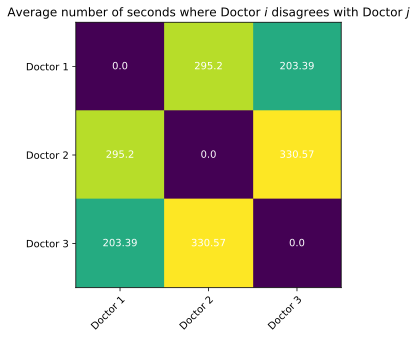

In [13]:
fig, ax = plt.subplots()

docs=['Doctor 1','Doctor 2','Doctor 3']

im = ax.imshow(sim)

ax.set_xticks(np.arange(len(docs)), labels=docs)
ax.set_yticks(np.arange(len(docs)), labels=docs)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title('Average number of seconds where Doctor $i$ disagrees with Doctor $j$')

for i in range(len(docs)):
    for j in range(len(docs)):
        text = ax.text(j, i, round(sim[i, j],2),
                       ha="center", va="center", color="w")



In [14]:
seizure_second_annotations_all_patients=[]
for patient_id in annotation_data_A.columns:
    secs_annot_A=np.sum(np.array(annotation_data_A[patient_id])[np.array(annotation_data_A[patient_id]>=0)])
    secs_annot_B=np.sum(np.array(annotation_data_B[patient_id])[np.array(annotation_data_B[patient_id]>=0)])
    secs_annot_C=np.sum(np.array(annotation_data_C[patient_id])[np.array(annotation_data_C[patient_id]>=0)])
    seizure_second_annotations_all_patients.append(np.array([secs_annot_A,secs_annot_B,secs_annot_C]))
seizure_second_annotations_all_patients=np.array(seizure_second_annotations_all_patients)

In [15]:
np.mean(seizure_second_annotations_all_patients,axis=0)

array([499.01351351, 672.2972973 , 550.24324324])

In [16]:
np.std(seizure_second_annotations_all_patients,axis=0)

array([ 754.54236163, 1025.55929012,  771.76802653])